In [1]:
from __future__ import division
from scipy import *
from pylab import *
from scipy.optimize import *
from tqdm import tqdm
import time
import os
from math import *
from math import tan
import numpy as np

# Parameters needed

In [2]:
## ====================================== Thalamus ===========================================

tT=0.005
DeltaTha = 0.007 + 0.007 + 0.001 + 0.005 + 0.001 + 0.001

In [3]:
def f(x):
    return(((((x**3)*(tT**3)) - 3*x*tT) / (1 - 3*(x**2)*(tT**2))) - tan(x*DeltaTha))

x = fsolve(f,100)
f(x)
print(x/6.28)


[ 13.83814881]


# Resolution process

In [4]:
angsp = []
freq = []
delai = np.arange(0,0.100,0.001)

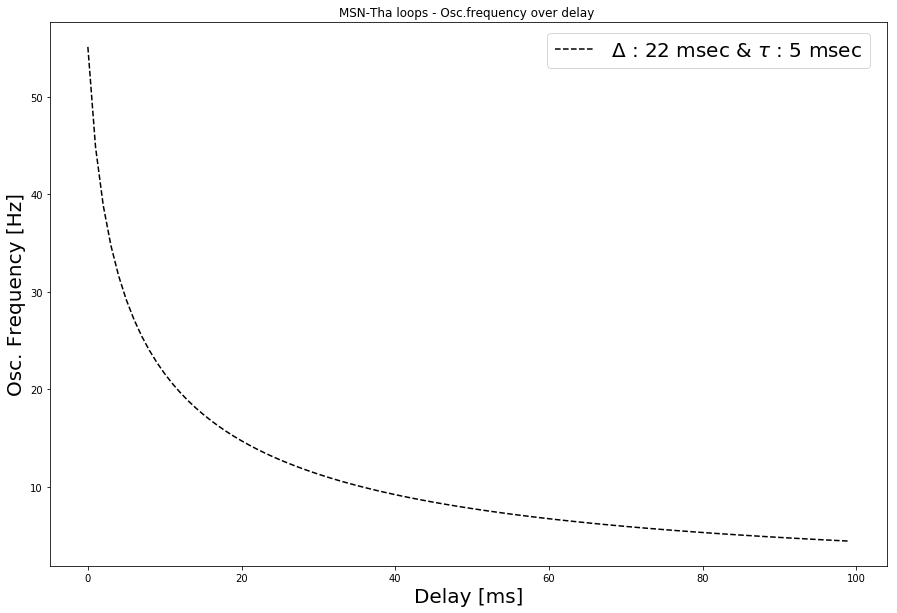

In [5]:
init=200
it=0

for z in np.arange(0,0.100,0.001):
    
    
    DeltaTha = z
    
    x = fsolve(f,init)
    f(x)
    #print(x/6.28,z,x)
    it+=1
    init = x-3
    
    angsp.append(x)    
    freq.append(x/6.28)

fig = plt.figure(figsize=(15,10))
plt.plot(delai*1000,freq,'k--',label = r'$\Delta$ : 22 msec & ' r'$\tau$ : 5 msec')
plt.title('MSN-Tha loops - Osc.frequency over delay ')
plt.xlabel('Delay [ms]',fontsize=20)
plt.ylabel('Osc. Frequency [Hz]',fontsize=20)
plt.legend(bbox_to_anchor=(0.98, 0.98), loc=1, borderaxespad=0., prop={'size':20})
plt.savefig('DataTha/Mn{}.png',dpi=72,bbox_inches='tight') # enable to save all figures
plt.show()

# Phase diagram

In [6]:
## ====================================== Thalamus ===========================================

tT=0.005
DeltaTha = 0.007 + 0.007 + 0.001 + 0.005 + 0.001 + 0.001
print(DeltaTha*1000)

22.000000000000004


In [7]:
w = round(float(angsp[10]),2)
print('w:', w)
print('f:', w/6.28)

a = 3

w: 135.51
f: 21.578025477707005


In [8]:
def f(b):
    return(a - b + ((1 - 3*(w**2)*(tT**2)) /cos(w*DeltaTha)))

b = fsolve(f,2)
f(b)
print(b)

[ 3.3821255]
